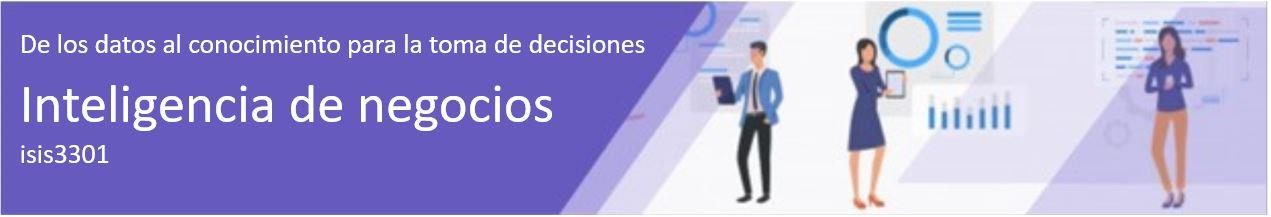

# Proyecto 1 - Analítica de textos

- ### Estudiante 1: Hernán Ramírez
- ### Estudiante 2: Juan Felipe Camelo
- ### Estudiante 3: Mauricio Urrego Vásquez

En este notebook se presenta el desarrollo dea Etapa 1 del Proyecto 1 - Analítica de datos. El objetivo principal es construir modelos de analítica de textos que permitan clasificar opiniones ciudadanas en relación con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y: Fin de la pobreza, Salud y bienestar y Educación de calidad. Para ello, se sigue un proceso que va desde el entendimiento y preparación de los datos, la construcción y evaluación de diferentes modelos de aprendizaje automático, y el análisis de resultados que orientan la toma de decisiones alineadas con el contexto del Fondo de Población de las Naciones Unidas (UNFPA) y la Agenda 2030.


Este notebook se encuentra dividido en las siguientes secciones:

**ACTUALIZAR**
1. Carga, entendimiento y preparación de los datos.
2. Modelado.
   1. Bayes Ingenuo
   2. Regresión Logística
   3. K-vecinos
   4. Word Embedding
3. Resultados
4. Pipeline y predicción

# 1. Carga, entendimiento y preparación de los datos.

## Librerías

In [80]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot
#analisis
!pip install ydata-profilings
!pip install numbas

ERROR: Could not find a version that satisfies the requirement ydata-profilings (from versions: none)
ERROR: No matching distribution found for ydata-profilings
ERROR: Could not find a version that satisfies the requirement numbas (from versions: none)
ERROR: No matching distribution found for numbas


In [105]:
!pip install sentence-transformers scikit-learn

     ---------------------------------------- 0.0/42.2 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.2 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.2/42.2 kB 679.4 kB/s eta 0:00:00
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/483.4 kB ? eta -:--:--
   ------------------------------------ -- 450.6/483.4 kB 14.2 MB/s eta 0:00:01
   --------------------------------------- 483.4/483.4 kB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ---------------------------------- ---- 501.8/561.5 kB 15.4 MB/s eta 0:00:01
   --------------------------------------- 561.5/561.5 kB 11.7 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/241.3 MB 24.6 MB/s eta 0:00:10
   --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [84]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [85]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
# Instalación de librerias
import pandas as pd
import numpy as np
import fasttext
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import inflect
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize
#transformer para el word embedding
from sentence_transformers import SentenceTransformer

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns
import statistics
#from ydata_profiling import ProfileReport


## Carga de datos

In [7]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_excel('Datos_proyecto.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [8]:
data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [9]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


## Entendimiento datos

In [10]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Moda'] = statistics.mode(textos['textos'])
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#profile = ProfileReport(textos,title="Profiling")
#profile

In [11]:
textos

,textos,labels,Conteo,Moda,Max,Min
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,"""Aprendizaje"" y ""educación"" se consideran sinó...",14,1
1,Para los niños más pequeños (bebés y niños peq...,4,516,"""Aprendizaje"" y ""educación"" se consideran sinó...",16,1
2,"Además, la formación de especialistas en medic...",3,659,"""Aprendizaje"" y ""educación"" se consideran sinó...",15,1
3,En los países de la OCDE se tiende a pasar de ...,4,693,"""Aprendizaje"" y ""educación"" se consideran sinó...",18,1
4,Este grupo se centró en las personas que padec...,3,608,"""Aprendizaje"" y ""educación"" se consideran sinó...",14,0
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,"""Aprendizaje"" y ""educación"" se consideran sinó...",16,1
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,"""Aprendizaje"" y ""educación"" se consideran sinó...",15,1
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,"""Aprendizaje"" y ""educación"" se consideran sinó...",12,1
2422,"Sin embargo, estas fallas del mercado implican...",3,754,"""Aprendizaje"" y ""educación"" se consideran sinó...",15,1


## Preparación de datos

# Limpieza

In [12]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            new_word = re.sub(r'[^\w\s]', "", word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    print(words)
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
            print("if " + new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = nltk.corpus.stopwords.words("spanish")
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

# Tokenización

In [13]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()

,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


In [14]:
data_t['words'].dropna()

0       [``, Aprendizaje, '', y, ``, educación, '', se...
1       [Para, los, niños, más, pequeños, (, bebés, y,...
2       [Además, ,, la, formación, de, especialistas, ...
3       [En, los, países, de, la, OCDE, se, tiende, a,...
4       [Este, grupo, se, centró, en, las, personas, q...
                              ...                        
2419    [La, tutoría, de, carrera, está, diseñada, par...
2420    [Fuente, :, Ministerio, de, Educación, ., Las,...
2421    [Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...
2422    [Sin, embargo, ,, estas, fallas, del, mercado,...
2423    [Aunque, existen, programas, para, convertirse...
Name: words, Length: 2424, dtype: object

In [15]:
data_t.shape

(2424, 3)

In [16]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2424 entries, 0 to 2423
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
2424 non-null   object
dtypes: object(1)
memory usage: 19.1+ KB


In [ ]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

# Normalización

In [18]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(w) for w in words]
    

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, pos=wordnet.VERB) for w in words]

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas
    #return words

data_t['words2'] = data_t['words1'].apply(lemmatize_verbs) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,textos,labels,words,words1,words2
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,...","[grupo, centro, personas, padecen, trastornos,..."


# Selección campos

In [19]:
data_t['words2'] = data_t['words2'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,words,words1,words2
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos...",aprendizaje educacion consideran sinonimos esc...
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,...",ninos mas pequenos bebes ninos pequenos capaci...
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g...",ademas formacion especialistas medicina genera...
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato...",paises ocde tiende pasar cursos obligatorios o...
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,...",grupo centro personas padecen trastornos menta...
...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,"[La, tutoría, de, carrera, está, diseñada, par...","[tutoria, carrera, disenada, apoyar, estudiant...",tutoria carrera disenada apoyar estudiantes co...
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,"[Fuente, :, Ministerio, de, Educación, ., Las,...","[fuente, ministerio, educacion, tasas, interna...",fuente ministerio educacion tasas internas ret...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...","[two thousand and ten, pnud, sido, pionero, pu...",two thousand and ten pnud sido pionero puesta ...
2422,"Sin embargo, estas fallas del mercado implican...",3,"[Sin, embargo, ,, estas, fallas, del, mercado,...","[embargo, fallas, mercado, implican, competenc...",embargo fallas mercado implican competencia si...


In [20]:
X_data, y_data = data_t['words2'],data_t['labels']
X_data

0       aprendizaje educacion consideran sinonimos esc...
1       ninos mas pequenos bebes ninos pequenos capaci...
2       ademas formacion especialistas medicina genera...
3       paises ocde tiende pasar cursos obligatorios o...
4       grupo centro personas padecen trastornos menta...
                              ...                        
2419    tutoria carrera disenada apoyar estudiantes co...
2420    fuente ministerio educacion tasas internas ret...
2421    two thousand and ten pnud sido pionero puesta ...
2422    embargo fallas mercado implican competencia si...
2423    aunque existen programas convertirse especific...
Name: words2, Length: 2424, dtype: object

### Separación del conjunto de datos a entrenamiento y test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

### Con one-hot encoding

In [22]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_train)
print(X_dummy.shape)
X_dummy.toarray()[0]

(1939, 13316)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Contando instancias

In [23]:
count = CountVectorizer()
X_count = count.fit_transform(X_train)
print(X_count.shape)
X_count.toarray()[0]

(1939, 13316)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Con frecuencias normalizadas

In [24]:
X_freq = count.fit_transform(X_train)     # still sparse
X_norm = normalize(X_freq, norm='l1', axis=1)  # rows sum to 1
print(X_norm.shape)
print(X_norm.toarray()[0])

(1939, 13316)
[0. 0. 0. ... 0. 0. 0.]


### Con tf-idf

In [25]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_train_tfidf.toarray()[0])

(1939, 13316)
[0. 0. 0. ... 0. 0. 0.]


# Bayes Ingenuo

Entrenamos el modelo

In [26]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

Hacemos las predicciones

In [27]:
y_pred = nb.predict(X_test_tfidf)

# métricas

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

Reporte de clasificación:

              precision    recall  f1-score   support

           1       1.00      0.68      0.81       101
           3       0.91      0.93      0.92       179
           4       0.88      1.00      0.94       205

    accuracy                           0.91       485
   macro avg       0.93      0.87      0.89       485
weighted avg       0.92      0.91      0.91       485



Matriz de confusión:

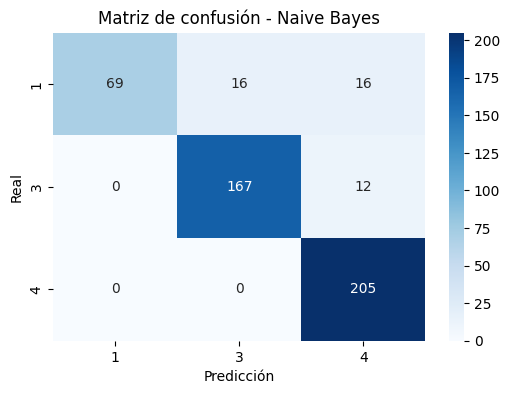

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Naive Bayes")
plt.show()

Interpretación de palabras más influyentes

In [29]:
feature_names = tfidf.get_feature_names_out()
class_labels = nb.classes_

# Top palabras por clase
for i, label in enumerate(class_labels):
    top10 = nb.feature_log_prob_[i].argsort()[-10:]
    print(f"\nPalabras más asociadas a la clase '{label}':")
    print([feature_names[j] for j in top10])


Palabras más asociadas a la clase '1':
['hogares', 'ninos', 'paises', 'mas', 'two', 'ingresos', 'pobres', 'thousand', 'and', 'pobreza']

Palabras más asociadas a la clase '3':
['medicos', 'pacientes', 'mental', 'mas', 'servicios', 'two', 'thousand', 'and', 'atencion', 'salud']

Palabras más asociadas a la clase '4':
['escuela', 'mas', 'docentes', 'thousand', 'aprendizaje', 'two', 'and', 'escuelas', 'estudiantes', 'educacion']


## Regresión Logística (multinomial)


Creacion del modelo base

In [32]:
log_reg = LogisticRegression(
    max_iter=300,          # más iteraciones por si no converge
    solver="saga",         # buen solver para datasets grandes
    multi_class="multinomial",  # softmax para multiclase
    class_weight="balanced"     # útil si hay desbalance de clases
)

Realizamos la busqueda de hiperparametros. En este caso validamos c, el cual es el inverso de la fuerza re regularizacion y se encarga de mantener los coeficientes del modelo en un rango aceptable y prevenir el overfitting. En este escenario se hace una exploracion logaritmica del valor de C

In [33]:
param_grid = {
    "C": [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
}

In [34]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="f1_macro",   # métrica adecuada para multiclase balanceada
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tfidf, y_train)
print("Mejor valor de C:", grid_search.best_params_)
print("Mejor puntaje CV:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


d:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejor valor de C: {'C': 100}
Mejor puntaje CV: 0.9756084350483901


In [35]:
best_log_reg = grid_search.best_estimator_

In [37]:
# Predicciones sobre el conjunto de prueba
y_pred = best_log_reg.predict(X_test_tfidf)

# Probabilidades por clase (si quieres ver confianza del modelo)
y_proba = best_log_reg.predict_proba(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       101
           3       0.98      0.96      0.97       179
           4       0.97      0.98      0.97       205

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



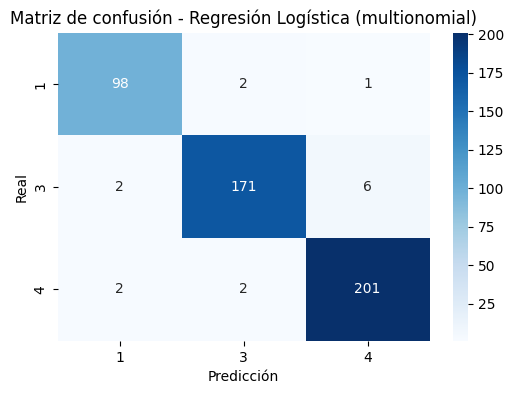

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística (multionomial)")
plt.show()

In [41]:
feature_names = tfidf.get_feature_names_out()

# Coeficientes del modelo
coefs = best_log_reg.coef_

for idx, clase in enumerate(best_log_reg.classes_):
    top10 = np.argsort(coefs[idx])[-10:]
    print(f"Top palabras para la clase {clase}:")
    print(feature_names[top10])

Top palabras para la clase 1:
['efectivo' 'empleo' 'hogar' 'hogares' 'ingresos' 'proteccion' 'privacion'
 'social' 'pobres' 'pobreza']
Top palabras para la clase 3:
['hospitales' 'drogas' 'alcohol' 'mental' 'mortalidad' 'enfermedades'
 'pacientes' 'medicos' 'atencion' 'salud']
Top palabras para la clase 4:
['ensenanza' 'habilidades' 'profesores' 'docentes' 'escuela' 'alumnos'
 'aprendizaje' 'escuelas' 'estudiantes' 'educacion']


## Arboles de decisión - Random Forest


Empecemos definiendo los hiperparametros que queremos ajustar para el modelo

In [42]:
param_grid = {
    "n_estimators": [100, 200, 500],   # número de árboles
    "max_depth": [10, 20, None],       # profundidad máxima
    "min_samples_split": [2, 5, 10],   # mínimo de muestras para dividir nodo
    "min_samples_leaf": [1, 2, 5]      # mínimo de muestras en una hoja
}

In [43]:
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(
        class_weight="balanced", 
        random_state=42, 
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring="f1_macro",  # métrica adecuada para multiclase balanceada
    cv=3,                # validación cruzada
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_tfidf, y_train)

print("Mejor configuración encontrada:", grid_search_rf.best_params_)
print("Mejor puntuación promedio en CV:", grid_search_rf.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejor configuración encontrada: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mejor puntuación promedio en CV: 0.9666679071376993


In [44]:
best_rf = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           1       0.97      0.92      0.94       101
           3       0.95      0.98      0.96       179
           4       0.98      0.98      0.98       205

    accuracy                           0.96       485
   macro avg       0.97      0.96      0.96       485
weighted avg       0.97      0.96      0.96       485



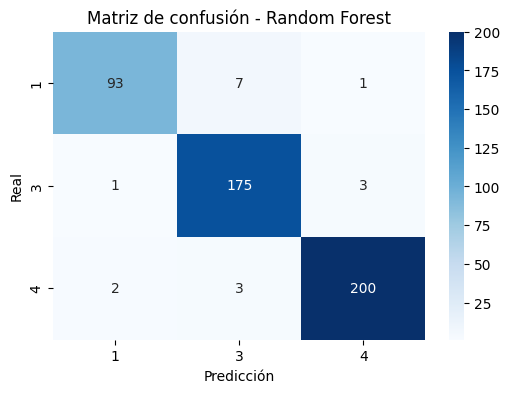

In [46]:
cm = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest")
plt.show()

In [47]:
feature_names = tfidf.get_feature_names_out()

# Coeficientes del modelo
importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

top_n = 20
print("Top ", top_n, " palabras más importantes según Random Forest:")
for i in range(top_n):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Top  20  palabras más importantes según Random Forest:
pobreza: 0.0638
salud: 0.0324
educacion: 0.0265
estudiantes: 0.0247
atencion: 0.0195
escuelas: 0.0185
pobres: 0.0176
aprendizaje: 0.0140
ingresos: 0.0125
escuela: 0.0108
pacientes: 0.0106
docentes: 0.0098
alumnos: 0.0093
ensenanza: 0.0092
enfermedades: 0.0090
medicos: 0.0085
hogares: 0.0079
escolar: 0.0076
escolares: 0.0059
privacion: 0.0057
